In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'G:\Meine Ablage\GoodNotes\Uni\6_semester\Machine Learning Project\Netflix_Datensatz\Netflix_stock.csv')

In [9]:
print(df.isna().sum())


date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Dividends            0
Stock Splits         0
Capital Gains        0
Transaction_Value    0
dtype: int64


In [10]:
df.dtypes

date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Dividends            float64
Stock Splits         float64
Capital Gains        float64
Transaction_Value    float64
dtype: object

In [11]:
df.head()

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Transaction_Value
0,1993-11-12,4.5313,4.6250,4.5000,4.5313,3055200,0.0,0.0,0.0,1.393935e+07
1,1993-11-15,4.5313,4.5938,4.5313,4.5313,998400,0.0,0.0,0.0,4.555250e+06
2,1993-11-16,4.3750,4.5625,4.3750,4.3750,722800,0.0,0.0,0.0,3.230012e+06
3,1993-11-17,4.4063,4.4688,4.4063,4.4063,325600,0.0,0.0,0.0,1.444866e+06
4,1993-11-18,4.4063,4.4063,4.3750,4.4063,227600,0.0,0.0,0.0,9.993119e+05


In [12]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Transaction_Value
count,6345.000000,6345.000000,6345.000000,6345.000000,6.345000e+03,6345.0,6345.000000,6345.0,6.345000e+03
mean,28.015806,28.469726,27.539785,28.021608,1.620724e+06,0.0,0.000630,0.0,5.450166e+07
std,16.083907,16.338762,15.800969,16.065682,1.880014e+06,0.0,0.035505,0.0,6.098157e+07
min,4.000000,4.062500,3.937500,4.000000,0.000000e+00,0.0,0.000000,0.0,0.000000e+00
25%,15.295000,15.594000,15.035000,15.375000,3.790000e+05,0.0,0.000000,0.0,5.603831e+06
50%,26.030001,26.510000,25.590000,26.070000,1.231365e+06,0.0,0.000000,0.0,4.476236e+07
75%,39.779999,40.410000,39.130001,39.799999,2.281415e+06,0.0,0.000000,0.0,8.539288e+07
max,77.070000,77.930000,75.889999,76.449997,5.244968e+07,0.0,2.000000,0.0,1.460865e+09


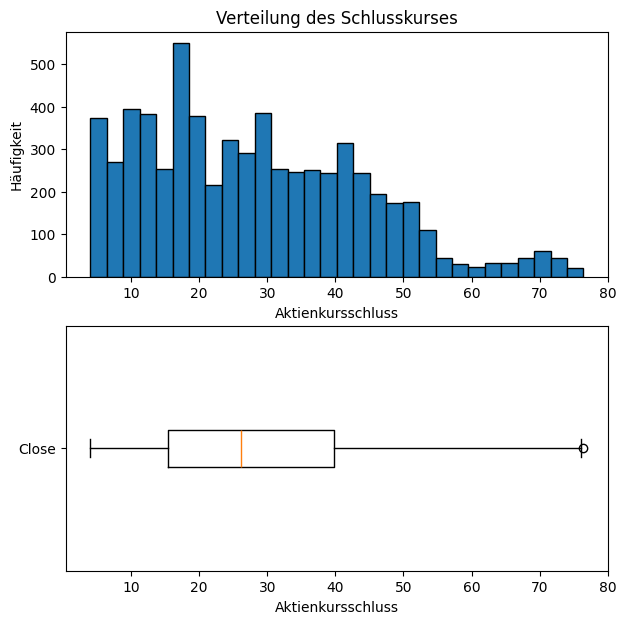

In [13]:
ig, ax = plt.subplots(2,1, figsize=(7,7))
ax[0].hist(df["Close"], bins=30, density=False, edgecolor="black")
ax[0].set_title("Verteilung des Schlusskurses")
ax[0].set_ylabel("Häufigkeit")
ax[0].set_xlabel("Aktienkursschluss")

ax[1].boxplot(df["Close"].fillna(df["Close"].median()), vert=False)
ax[1].set_yticklabels(["Close"])
ax[1].set_xlabel("Aktienkursschluss")
plt.show()

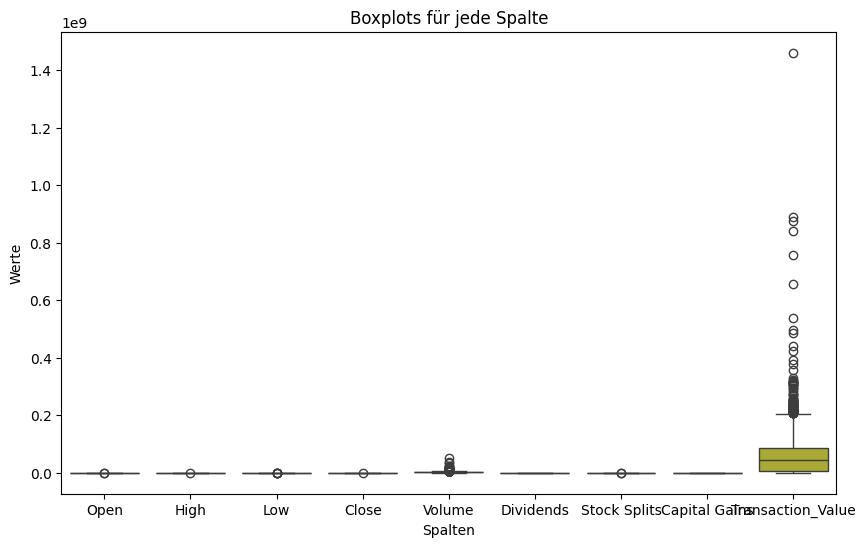

In [14]:
import seaborn as sns

# Setze das Plot-Layout
plt.figure(figsize=(10, 6))

# Boxplot aller Spalten auf einmal
sns.boxplot(data=df)

# Titel und Achsenbeschriftung
plt.title('Boxplots für jede Spalte')
plt.xlabel('Spalten')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

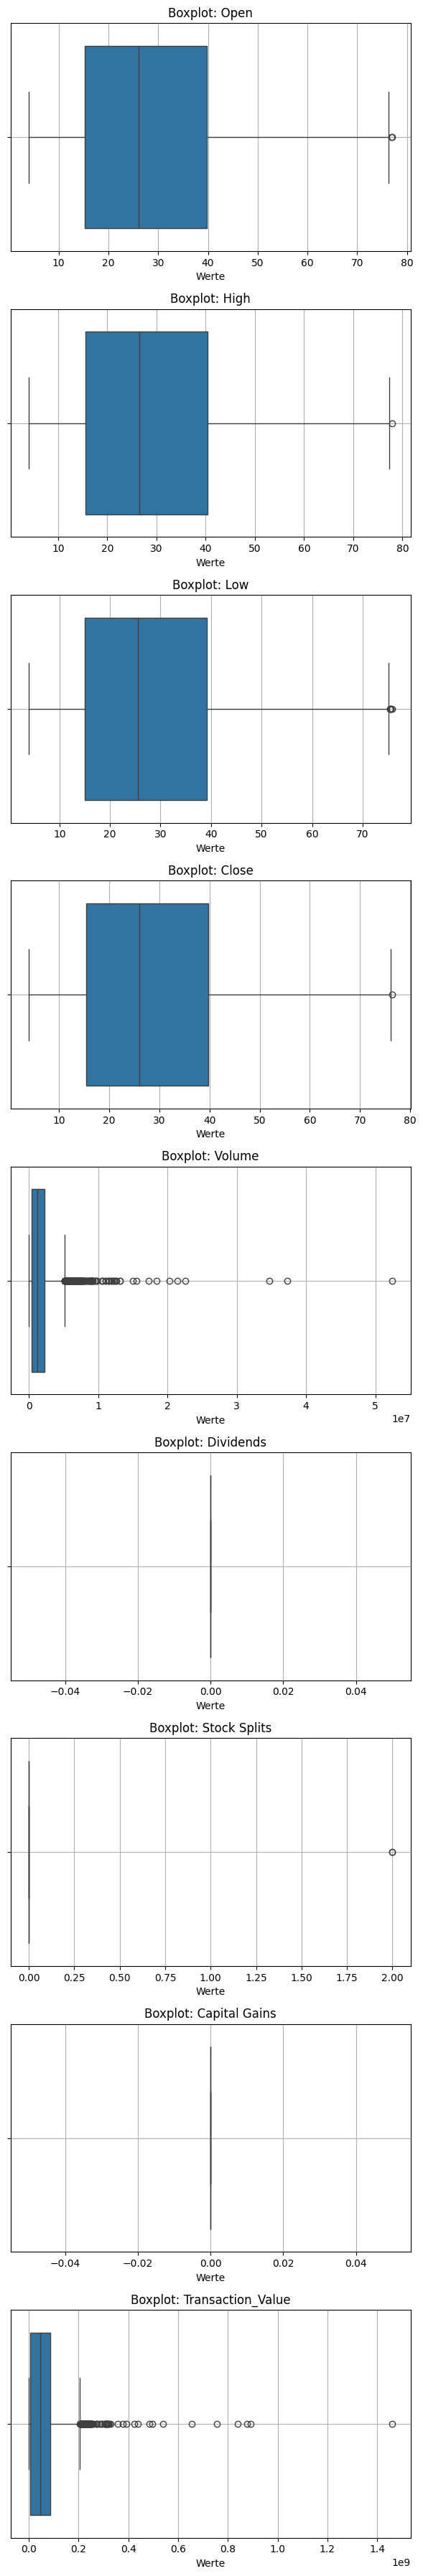

In [ ]:
# Subplots vorbereiten
numerische_spalten = df.select_dtypes(include='number').columns

anzahl = len(numerische_spalten)
fig, axs = plt.subplots(nrows=anzahl, figsize=(6, 4 * anzahl))

# Einzelne Boxplots
for i, spalte in enumerate(numerische_spalten):
    sns.boxplot(x=df[spalte], ax=axs[i], orient='h')
    axs[i].set_title(f'Boxplot: {spalte}')
    axs[i].set_xlabel('Werte')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

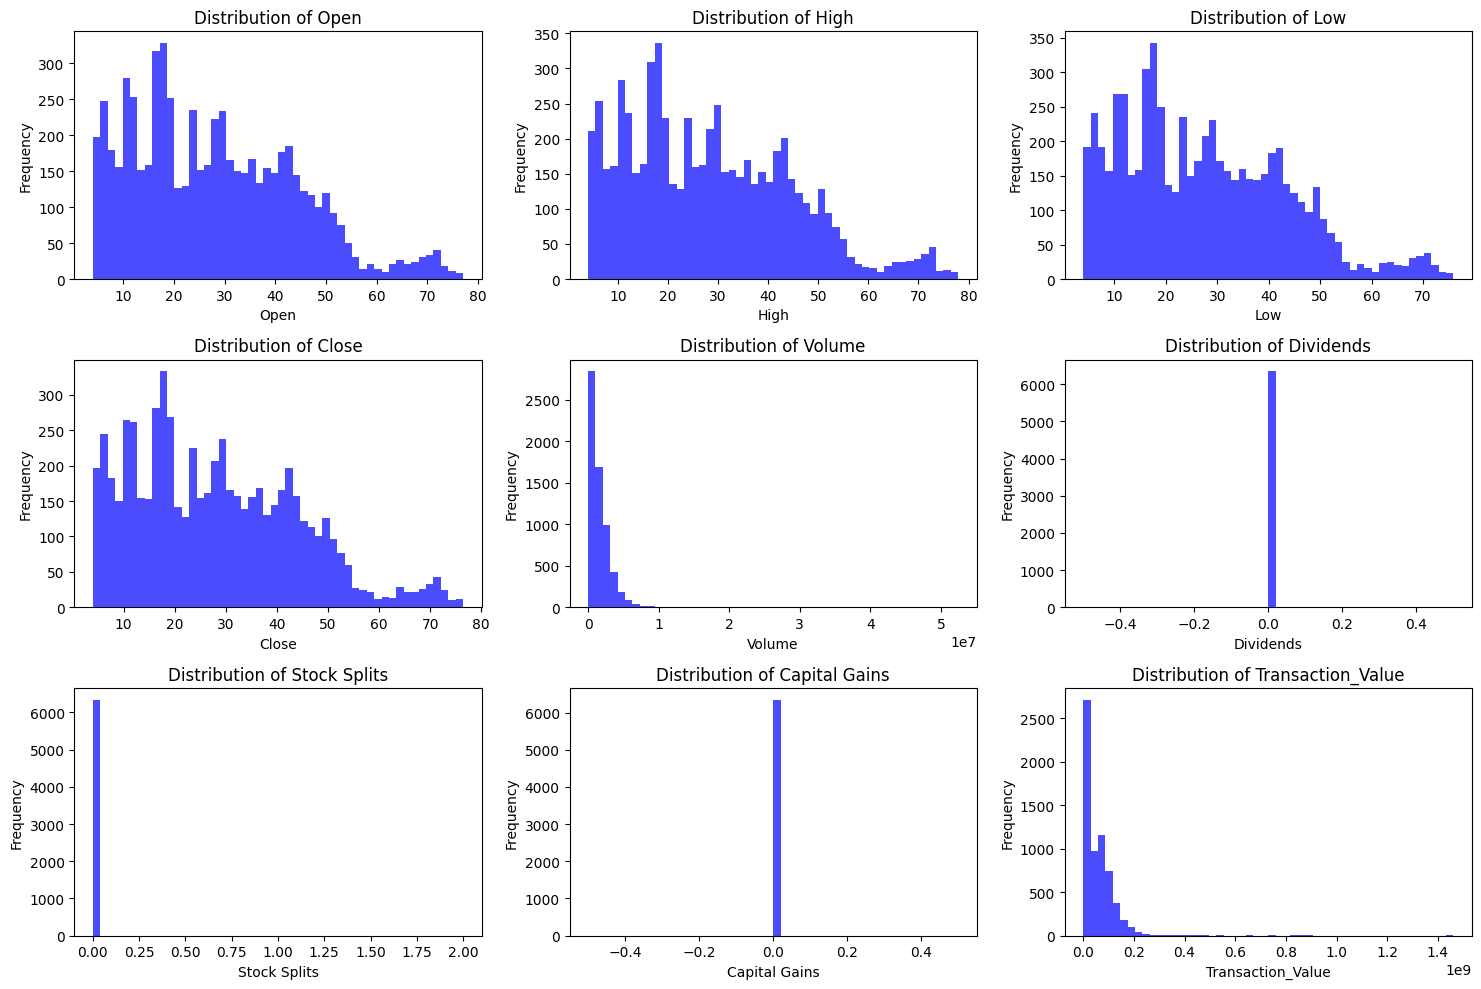

In [ ]:
plt.figure(figsize=(15, 10))

df_no_date = df.drop(columns='date')

# Plotting the distribution of each feature
for i, column in enumerate(df_no_date.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df_no_date[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df_stock = df.loc[
    (df['Stock Splits'] > 0.5)
]

df_stock

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Transaction_Value
788,1996-12-31,12.88,13.000000,12.813,13.000000,98000,0.0,2.0,0.0,1.264837e+06
2893,2005-05-26,36.27,36.619999,36.000,36.580002,953100,0.0,2.0,0.0,3.460706e+07


In [ ]:
df = df.drop(columns=['Dividends', 'Capital Gains'])


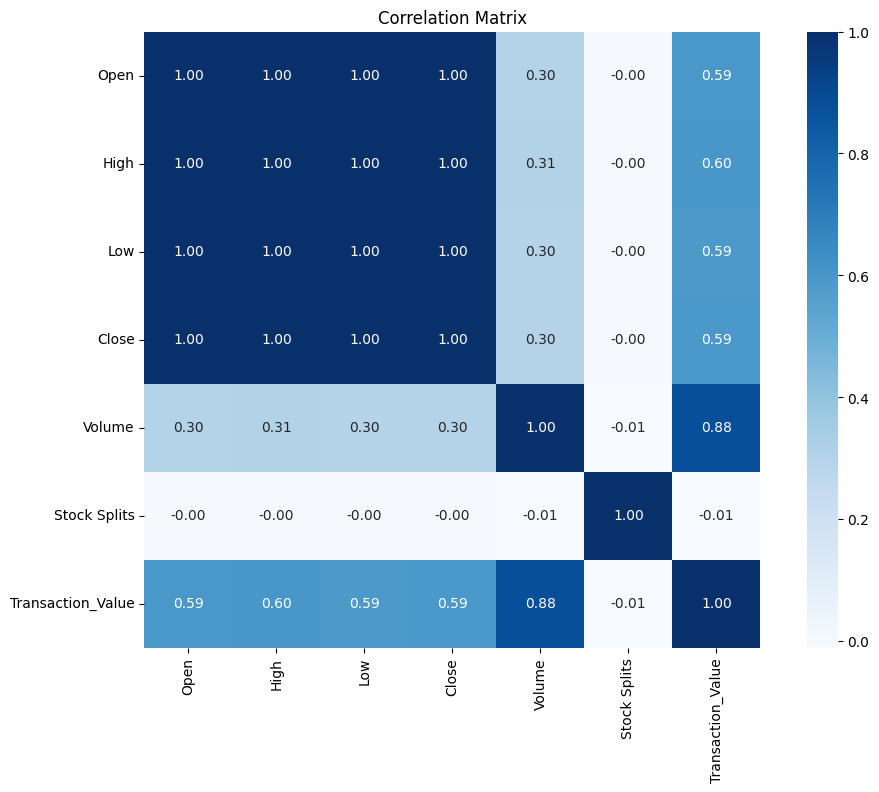

In [27]:
import numpy as np

# Nur numerische Spalten für Korrelation
correlation_matrix = df.select_dtypes(include='number').corr()

# Heatmap anzeigen
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True)
plt.title('Correlation Matrix')
plt.show()

## Zeitreihe

In [ ]:
import plotly.express as px

fig = px.line(df, x='date', y='Close', title='Netflix Schlusskurs über Zeit')
fig.show()
